# 
Title: To Classify the Patients Using Naive Bayes and SV## 
Objective:

To compare and evaluate the performance of the Naive Bayes and Support Vector Machine (SVM) algorithms for classifying patients with heart disea## se.

Th## eory:

Naive Bayes

The Naive Bayes algorithm is a probabilistic classifier that is based on Bayes' theorem. Bayes' theorem is a mathematical formula that can be used to calculate the probability of an event occurring given that other events have already occurred.

The Naive Bayes algorithm works by assuming that the features of a data point are independent of each other. This means that the occurrence of one feature does not affect the occurrence of any other feature.

The formula for Naive Bayes is as follows:

P(C | X) = P(X | C) * P(C) / P(X)
where:

P(C | X) is the posterior probability of class C given data point X.
P(X | C) is the likelihood of data point X given class C.
P(C) is the prior probability of class C.
P(X) is the prior probability of data point X.
Types of Naive Bayes

There are three main types of Naive Bayes classifiers:

Multinomial Naive Bayes: This type of Naive Bayes classifier is used for data that is represented as counts of words or other features.
Gaussian Naive Bayes: This type of Naive Bayes classifier is used for data that is represented as continuous values.
Bernoulli Naive Bayes: This type of Naive Bayes classifier is used for data that is represented as binary values (true or false).
Support Vector Machine (SVM)

The SVM algorithm is a discriminative classifier that is based on the principle of finding a hyperplane that separates the data points into two classes with the maximum margin. The margin is the distance between the hyperplane and the closest data points from each class.

To find the hyperplane with the maximum margin, the SVM algorithm uses a technique called kernel mapping. Kernel mapping transforms the data points into a higher-dimensional space where it is easier to find a hyperplane that separates the data points into two classes.

Types of SVMs

There are two main types of SVMs:

Linear SVM: This type of SVM uses a linear hyperplane to separate the data points.
Non-Linear SVM: This type of SVM uses a non-linear hyperplane to separate the data points.
Conclusion

Both Naive Bayes and SVM are effective algorithms for classifying patients with heart disease. The best algorithm for a particular application will depend on the specific characteristics of the data and the desired performance.

Additional Notes:

Naive Bayes is a good choice for tasks where the data is noisy or where the independence assumption can be reasonably well-satisfied.
SVM is a good choice for tasks where the data is non-linear or where there are outliers in the data.
Both Naive Bayes and SVM can be used in conjunction with other machine learning techniques to improve performance,
 such as feature selection and ensemble learning.

In [1]:
# !pip install tensorflow

In [2]:
#importing 

import pandas as pd # dataset viewing and manipulation -> data cleaning, encoding
import numpy as np # values manipulation
import sklearn # model creation, training, testing, remoddelling
import matplotlib.pyplot as plt #data visualisation-> line plot, scatter plot, pair plot, histogram
%matplotlib inline 
#returned value -> graph/plot convert and display

print("Imported!")

Imported!


In [3]:
# dataset loading  ---> cell run (shift +enter)
file = pd.read_csv("./datasets/heart-missing-classification-dataset.csv")
file

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0
1,37.0,1.0,NaN,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,NaN,NaN
3,56.0,1.0,1.0,120.0,NaN,0.0,1.0,178.0,0.0,NaN,2.0,NaN,2.0,1.0
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,0.0,0.0,140.0,241.0,0.0,1.0,123.0,1.0,0.2,1.0,0.0,3.0,0.0
299,45.0,1.0,3.0,110.0,264.0,0.0,1.0,132.0,0.0,1.2,1.0,0.0,3.0,0.0
300,68.0,1.0,0.0,144.0,193.0,1.0,1.0,141.0,0.0,3.4,1.0,2.0,3.0,0.0
301,57.0,1.0,0.0,130.0,131.0,0.0,1.0,115.0,1.0,1.2,1.0,1.0,3.0,0.0


In [4]:
file["alphabet"]=[x for x in range(len(file["age"]))]
file["alphabet"] = file["alphabet"].astype(str)

In [5]:
file.isna().sum() #gives the total of nan values in each column

age                    12
sex                     7
chest_pain_type         2
resting_bp             11
cholestoral            15
fasting_blood_sugar     4
restecg                 6
max_hr                 16
exang                   2
oldpeak                14
slope                  11
num_major_vessels      10
thal                    9
target                 12
alphabet                0
dtype: int64

In [6]:
print(file.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  291 non-null    float64
 1   sex                  296 non-null    float64
 2   chest_pain_type      301 non-null    float64
 3   resting_bp           292 non-null    float64
 4   cholestoral          288 non-null    float64
 5   fasting_blood_sugar  299 non-null    float64
 6   restecg              297 non-null    float64
 7   max_hr               287 non-null    float64
 8   exang                301 non-null    float64
 9   oldpeak              289 non-null    float64
 10  slope                292 non-null    float64
 11  num_major_vessels    293 non-null    float64
 12  thal                 294 non-null    float64
 13  target               291 non-null    float64
 14  alphabet             303 non-null    object 
dtypes: float64(14), object(1)
memory usage: 

In [7]:
# if the object column is present then 

# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer

# categorical_features = ["Manufacturer","Vehicle_type"]
# one_hot = OneHotEncoder()
# transformer = ColumnTransformer([("one_hot",one_hot,categorical_features)],
#                                remainder = "passthrough")

# transfromed_x = transformer.fit_transform(x)
# transfromed_x

# file = pd.DataFrame(transfromed_x)

# file

In [8]:
# file = file.drop("alphabet", axis = 1)
file

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target,alphabet
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0,0
1,37.0,1.0,NaN,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0,1
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,NaN,NaN,2
3,56.0,1.0,1.0,120.0,NaN,0.0,1.0,178.0,0.0,NaN,2.0,NaN,2.0,1.0,3
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,0.0,0.0,140.0,241.0,0.0,1.0,123.0,1.0,0.2,1.0,0.0,3.0,0.0,298
299,45.0,1.0,3.0,110.0,264.0,0.0,1.0,132.0,0.0,1.2,1.0,0.0,3.0,0.0,299
300,68.0,1.0,0.0,144.0,193.0,1.0,1.0,141.0,0.0,3.4,1.0,2.0,3.0,0.0,300
301,57.0,1.0,0.0,130.0,131.0,0.0,1.0,115.0,1.0,1.2,1.0,1.0,3.0,0.0,301


In [9]:
# filling the blank cells of the dataset
file = file.fillna(file.mean())

file.isna().sum()

age                    0
sex                    0
chest_pain_type        0
resting_bp             0
cholestoral            0
fasting_blood_sugar    0
restecg                0
max_hr                 0
exang                  0
oldpeak                0
slope                  0
num_major_vessels      0
thal                   0
target                 0
alphabet               0
dtype: int64

In [10]:
# splitting

from sklearn.model_selection import train_test_split #horizontal split

# vertical spltting:
x = file.drop("target",axis =1)
y = file["target"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)


In [11]:
x

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,alphabet
0,63.0,1.0,3.000000,145.0,233.000000,1.0,0.0,150.0,0.0,2.300000,0.0,0.000000,1.000000,0
1,37.0,1.0,0.966777,130.0,250.000000,0.0,1.0,187.0,0.0,3.500000,0.0,0.000000,2.000000,1
2,41.0,0.0,1.000000,130.0,204.000000,0.0,0.0,172.0,0.0,1.400000,2.0,0.000000,2.319728,2
3,56.0,1.0,1.000000,120.0,246.385417,0.0,1.0,178.0,0.0,1.060208,2.0,0.750853,2.000000,3
4,57.0,0.0,0.000000,120.0,354.000000,0.0,1.0,163.0,1.0,0.600000,2.0,0.000000,2.000000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,0.0,0.000000,140.0,241.000000,0.0,1.0,123.0,1.0,0.200000,1.0,0.000000,3.000000,298
299,45.0,1.0,3.000000,110.0,264.000000,0.0,1.0,132.0,0.0,1.200000,1.0,0.000000,3.000000,299
300,68.0,1.0,0.000000,144.0,193.000000,1.0,1.0,141.0,0.0,3.400000,1.0,2.000000,3.000000,300
301,57.0,1.0,0.000000,130.0,131.000000,0.0,1.0,115.0,1.0,1.200000,1.0,1.000000,3.000000,301


In [12]:
y

0      1.000000
1      1.000000
2      0.525773
3      1.000000
4      1.000000
         ...   
298    0.000000
299    0.000000
300    0.000000
301    0.000000
302    0.000000
Name: target, Length: 303, dtype: float64

In [13]:
x_train

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,alphabet
121,59.0,1.0,0.0,138.0,271.0,0.000000,0.0,182.0,0.0,0.000000,2.0,0.0,2.0,121
292,58.0,0.0,0.0,170.0,225.0,1.000000,0.0,146.0,1.0,2.800000,1.0,2.0,1.0,292
239,35.0,1.0,0.0,126.0,282.0,0.000000,0.0,156.0,1.0,0.000000,2.0,0.0,3.0,239
130,54.0,0.0,2.0,160.0,201.0,0.000000,1.0,163.0,0.0,0.000000,2.0,1.0,2.0,130
170,56.0,1.0,2.0,130.0,256.0,1.000000,0.0,142.0,1.0,0.600000,1.0,1.0,1.0,170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,60.0,0.0,0.0,150.0,258.0,0.000000,0.0,157.0,0.0,2.600000,1.0,2.0,3.0,207
20,59.0,1.0,0.0,135.0,234.0,0.000000,1.0,161.0,0.0,1.060208,1.0,0.0,3.0,20
34,51.0,1.0,3.0,125.0,213.0,0.150502,0.0,125.0,1.0,1.400000,2.0,1.0,2.0,34
302,57.0,0.0,1.0,130.0,236.0,0.000000,0.0,174.0,0.0,0.000000,1.0,1.0,2.0,302


In [14]:
x_test

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,alphabet
58,34.0,1.0,3.0,118.0,182.0,0.0,0.0,174.000000,0.0,0.0,2.0,0.0,2.000000,58
267,49.0,1.0,2.0,118.0,149.0,0.0,0.0,126.000000,0.0,0.8,2.0,3.0,2.000000,267
162,41.0,1.0,1.0,120.0,157.0,0.0,1.0,182.000000,0.0,0.0,2.0,0.0,2.000000,162
203,68.0,1.0,2.0,180.0,274.0,1.0,0.0,150.000000,1.0,1.6,1.0,0.0,3.000000,203
8,52.0,1.0,2.0,172.0,199.0,1.0,1.0,149.651568,0.0,0.5,2.0,0.0,2.319728,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,76.0,0.0,2.0,140.0,197.0,0.0,2.0,116.000000,0.0,1.1,1.0,0.0,2.000000,144
13,64.0,1.0,3.0,110.0,211.0,0.0,0.0,144.000000,1.0,1.8,1.0,0.0,2.000000,13
300,68.0,1.0,0.0,144.0,193.0,1.0,1.0,141.000000,0.0,3.4,1.0,2.0,3.000000,300
238,77.0,1.0,0.0,125.0,304.0,0.0,0.0,162.000000,1.0,0.0,2.0,3.0,2.000000,238


In [15]:
y_train

121    1.000000
292    0.000000
239    0.000000
130    1.000000
170    0.000000
         ...   
207    0.000000
20     1.000000
34     0.525773
302    0.000000
231    0.000000
Name: target, Length: 242, dtype: float64

In [16]:
y_test

58     1.0
267    0.0
162    1.0
203    0.0
8      1.0
      ... 
144    1.0
13     1.0
300    0.0
238    0.0
102    1.0
Name: target, Length: 61, dtype: float64

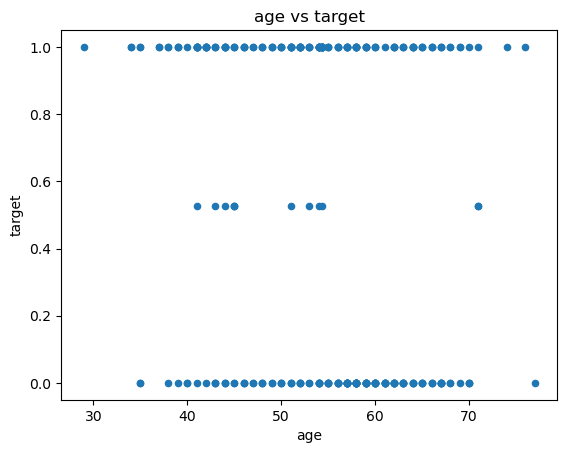

In [17]:
file.plot("age","target",title="age vs target", xlabel = "age", ylabel="target",kind="scatter");

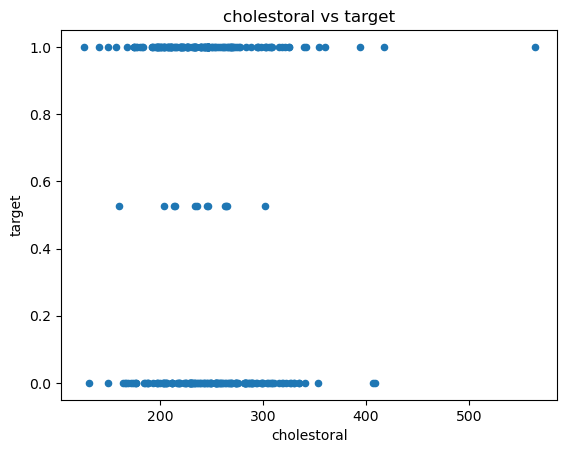

In [18]:
file.plot("cholestoral","target",title="cholestoral vs target", xlabel = "cholestoral", ylabel="target",kind="scatter");

In [19]:
file

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target,alphabet
0,63.0,1.0,3.000000,145.0,233.000000,1.0,0.0,150.0,0.0,2.300000,0.0,0.000000,1.000000,1.000000,0
1,37.0,1.0,0.966777,130.0,250.000000,0.0,1.0,187.0,0.0,3.500000,0.0,0.000000,2.000000,1.000000,1
2,41.0,0.0,1.000000,130.0,204.000000,0.0,0.0,172.0,0.0,1.400000,2.0,0.000000,2.319728,0.525773,2
3,56.0,1.0,1.000000,120.0,246.385417,0.0,1.0,178.0,0.0,1.060208,2.0,0.750853,2.000000,1.000000,3
4,57.0,0.0,0.000000,120.0,354.000000,0.0,1.0,163.0,1.0,0.600000,2.0,0.000000,2.000000,1.000000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,0.0,0.000000,140.0,241.000000,0.0,1.0,123.0,1.0,0.200000,1.0,0.000000,3.000000,0.000000,298
299,45.0,1.0,3.000000,110.0,264.000000,0.0,1.0,132.0,0.0,1.200000,1.0,0.000000,3.000000,0.000000,299
300,68.0,1.0,0.000000,144.0,193.000000,1.0,1.0,141.0,0.0,3.400000,1.0,2.000000,3.000000,0.000000,300
301,57.0,1.0,0.000000,130.0,131.000000,0.0,1.0,115.0,1.0,1.200000,1.0,1.000000,3.000000,0.000000,301


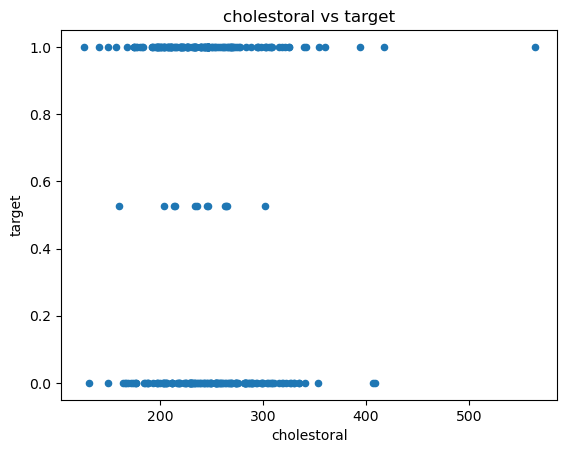

In [20]:
file.plot("cholestoral","target",title="cholestoral vs target", xlabel = "cholestoral", ylabel="target", kind = "scatter");

In [22]:
# machine learning - >
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

from sklearn import svm
model.fit(x_train,y_train)
print("the accuracy of the model is",model.score(x_test,y_test) )

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [ ]:
from sklearn import naive_bayes
model.fit(x_train,y_train)
print("the accuracy of the model is", model.score(x_test,y_test))
